# Binary Classification Prediction for type of Breast Cancer

## Machine Learning Course - NCSR Demokritos 2022-2023

### Author: Alexandros Filios - mtn2219


#### About:
**_Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area._**

## Introduction

## Libraries:

In [862]:
# ------------------------------------------------------------------------------
#                              Data
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# ------------------------------------------------------------------------------
#                               ML
# ------------------------------------------------------------------------------
# Scaling
from sklearn.preprocessing import StandardScaler
# Split
from sklearn.model_selection import train_test_split
# Models/Methods
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score


# Feature Selection:
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS 
from sklearn.feature_selection import SequentialFeatureSelector as SFS # Wrappers
from sklearn.linear_model import LassoCV # Lasso

# ------------------------------------------------------------------------------
#                               Plots
# ------------------------------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px


## Data Processing

### Dataset Formatting

### Read the data

In [863]:
df=pd.read_csv("breast-cancer.csv") # Read the .csv file and get the pandas dataset

### Bring the data in the form of X, y and make the necessary changes

In [864]:
# Remove the id as it does not actually resemble a feature
df = df.drop("id", axis=1)
# Encode the diagnosis label as follows: 1 for Malignant & 0 Benign
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) 
# Extract the labels for all of our data
y = df["diagnosis"]
# Remove the labels from the data
X = df.drop("diagnosis", axis=1)

In [865]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Class Imbalance Check

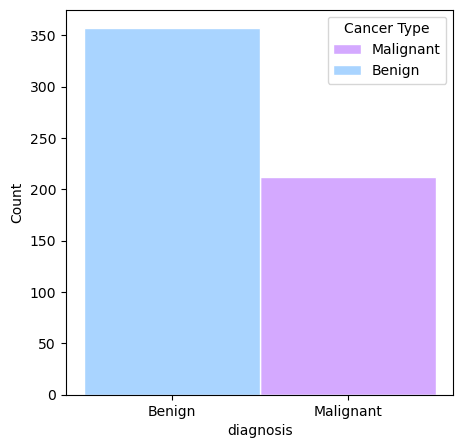

In [866]:
# Figures size
plt.figure(figsize=(5,5))
# Plot
fig = sb.histplot(data=df, x="diagnosis", hue="diagnosis", palette = 'cool', discrete = True, edgecolor='w')
# Make the X-Axes Labels more explanatory
fig.set_xticks([0, 1],['Benign', 'Malignant']) #custom tickers with custom labels
# Make the legend more explanatory 
fig.legend(title='Cancer Type', bbox_to_anchor=(1, 1), labels=['Malignant', 'Benign'])
# Show it
plt.show()

### Data Split

In [867]:
# Split the  data into Training and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10, stratify=y)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

### Feature Scaling

Why: 
- Features in a controlled range so that we avoid problems with numerical overflow
- Increased speed learning (consider gradient descent)
- Distance-based algorithm such as knn, k-means and svm are affected by range of features

**Note**: Scaling parameters (either min/max or μ/σ) are computed on the training data and applied on the validation data

In [868]:
scale = StandardScaler().fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)  
print("Training set Standarized: ")
print(X_train_scaled) 

Training set Standarized: 
[[-0.02417551 -1.48121936 -0.09656179 ... -0.87248671 -1.31165457
  -0.71145132]
 [-0.71187546 -0.2254144  -0.69650042 ...  0.09825001 -0.14025246
   0.37891819]
 [-0.40282811 -0.60100377 -0.40016465 ... -0.53990521  0.29943814
   0.08656489]
 ...
 [-0.55039126  0.16860881 -0.52289772 ... -0.53326901 -0.30119581
   0.23923828]
 [-0.54203863 -0.31527934 -0.57134499 ... -0.5142864   0.36912495
  -0.14352798]
 [-1.55883224  0.38520637 -1.52454493 ... -1.35276217  0.13517637
  -0.37091387]]


### Feature Selection

There are several reasons to apply feauture selection on our data. From achieving better performance to even avoiding overfitting. Of course some of the classfiers we are going to use are considered to be robust to noisy/non-informative features. Despite that fact in this implementation we will try to achieve simple and faster models and reduce the number of features, by keeping the most meaningful ones, in a way that makes the data more understandable for both the developers and the possible clients(doctors and patients). 

Feature selection is done after data preprocessing. Ideally  all the categorical variables should be encoded into numbers, so that we can assess how deterministic they are for target. Currently we are dealling with numerical columns only, so we may proceed

#### Histograms

In [869]:
df.columns.shape[0]

31

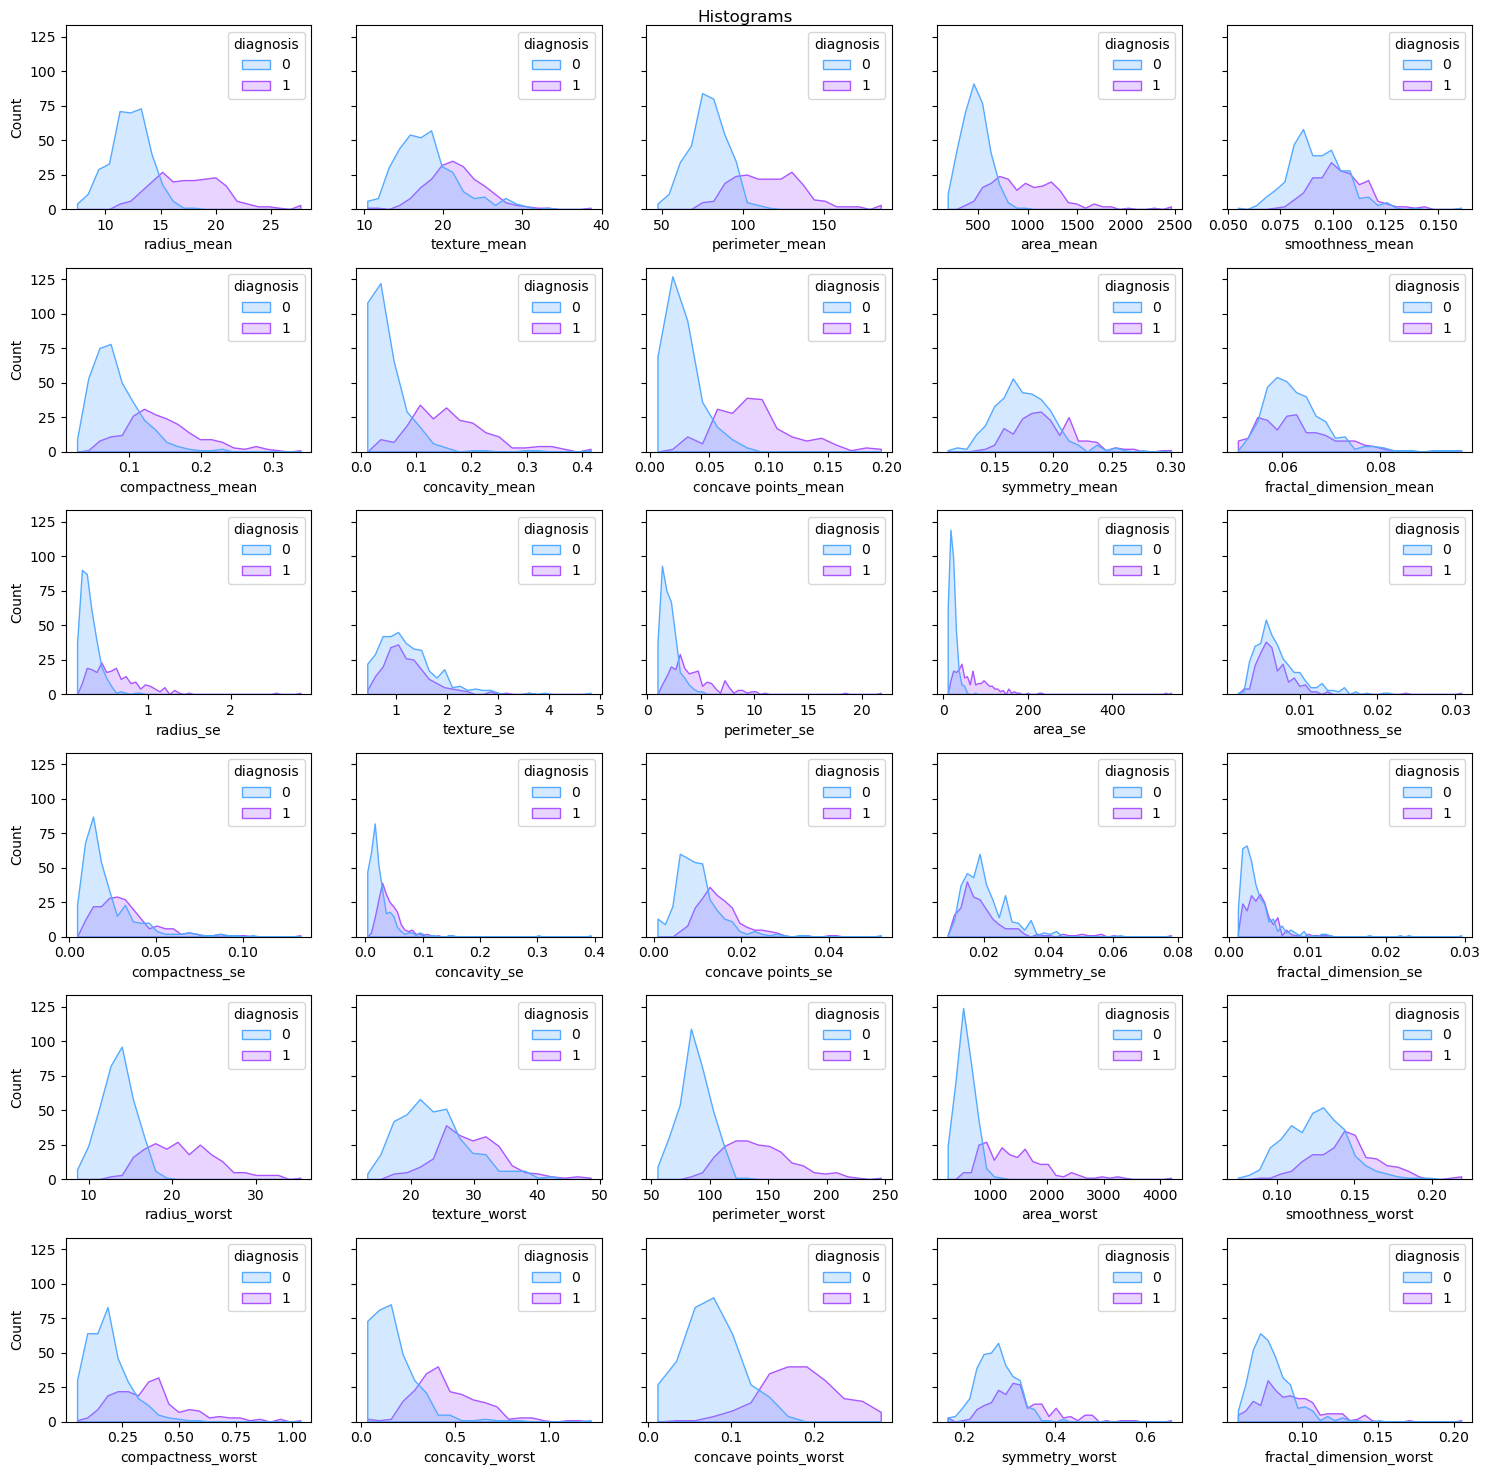

In [870]:
num_of_rows = 6
num_of_cols = 5
fig, axes = plt.subplots(num_of_rows, num_of_cols, figsize=(15, 15),  tight_layout=True, sharey=True)
fig.suptitle('Histograms')
i=0
j=0
for feature in df.columns:
    if(feature == 'diagnosis'):
        continue
    #fig = px.histogram(data_frame=df,x=feature,color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])
    sb.histplot(ax=axes[i,j], data=df, x=feature, hue="diagnosis",element="poly", palette = 'cool')
    #axes[i,j].set_title(feature)
    if(j == num_of_cols-1):
        i+=1
        j=0
    else:
        j+=1

Feature Selection: How
1) Measure (Pearson) correlation
- Between features (we want it to be small!) or
- Between features and target values (we want it to be big!)
2) Using a “Wrapper” method:
- Train and evaluate a model with different features and use its performance to evaluate the features used
- Backward elimination: use all features and remove features
- Recursive elimination: recursively remove features and build a model on the remaining features (uses accuracy)
3) Lasso (also used for regularization)

#### Pearson Correlation

In [871]:
pearsoncorr = X.corr(method='pearson')

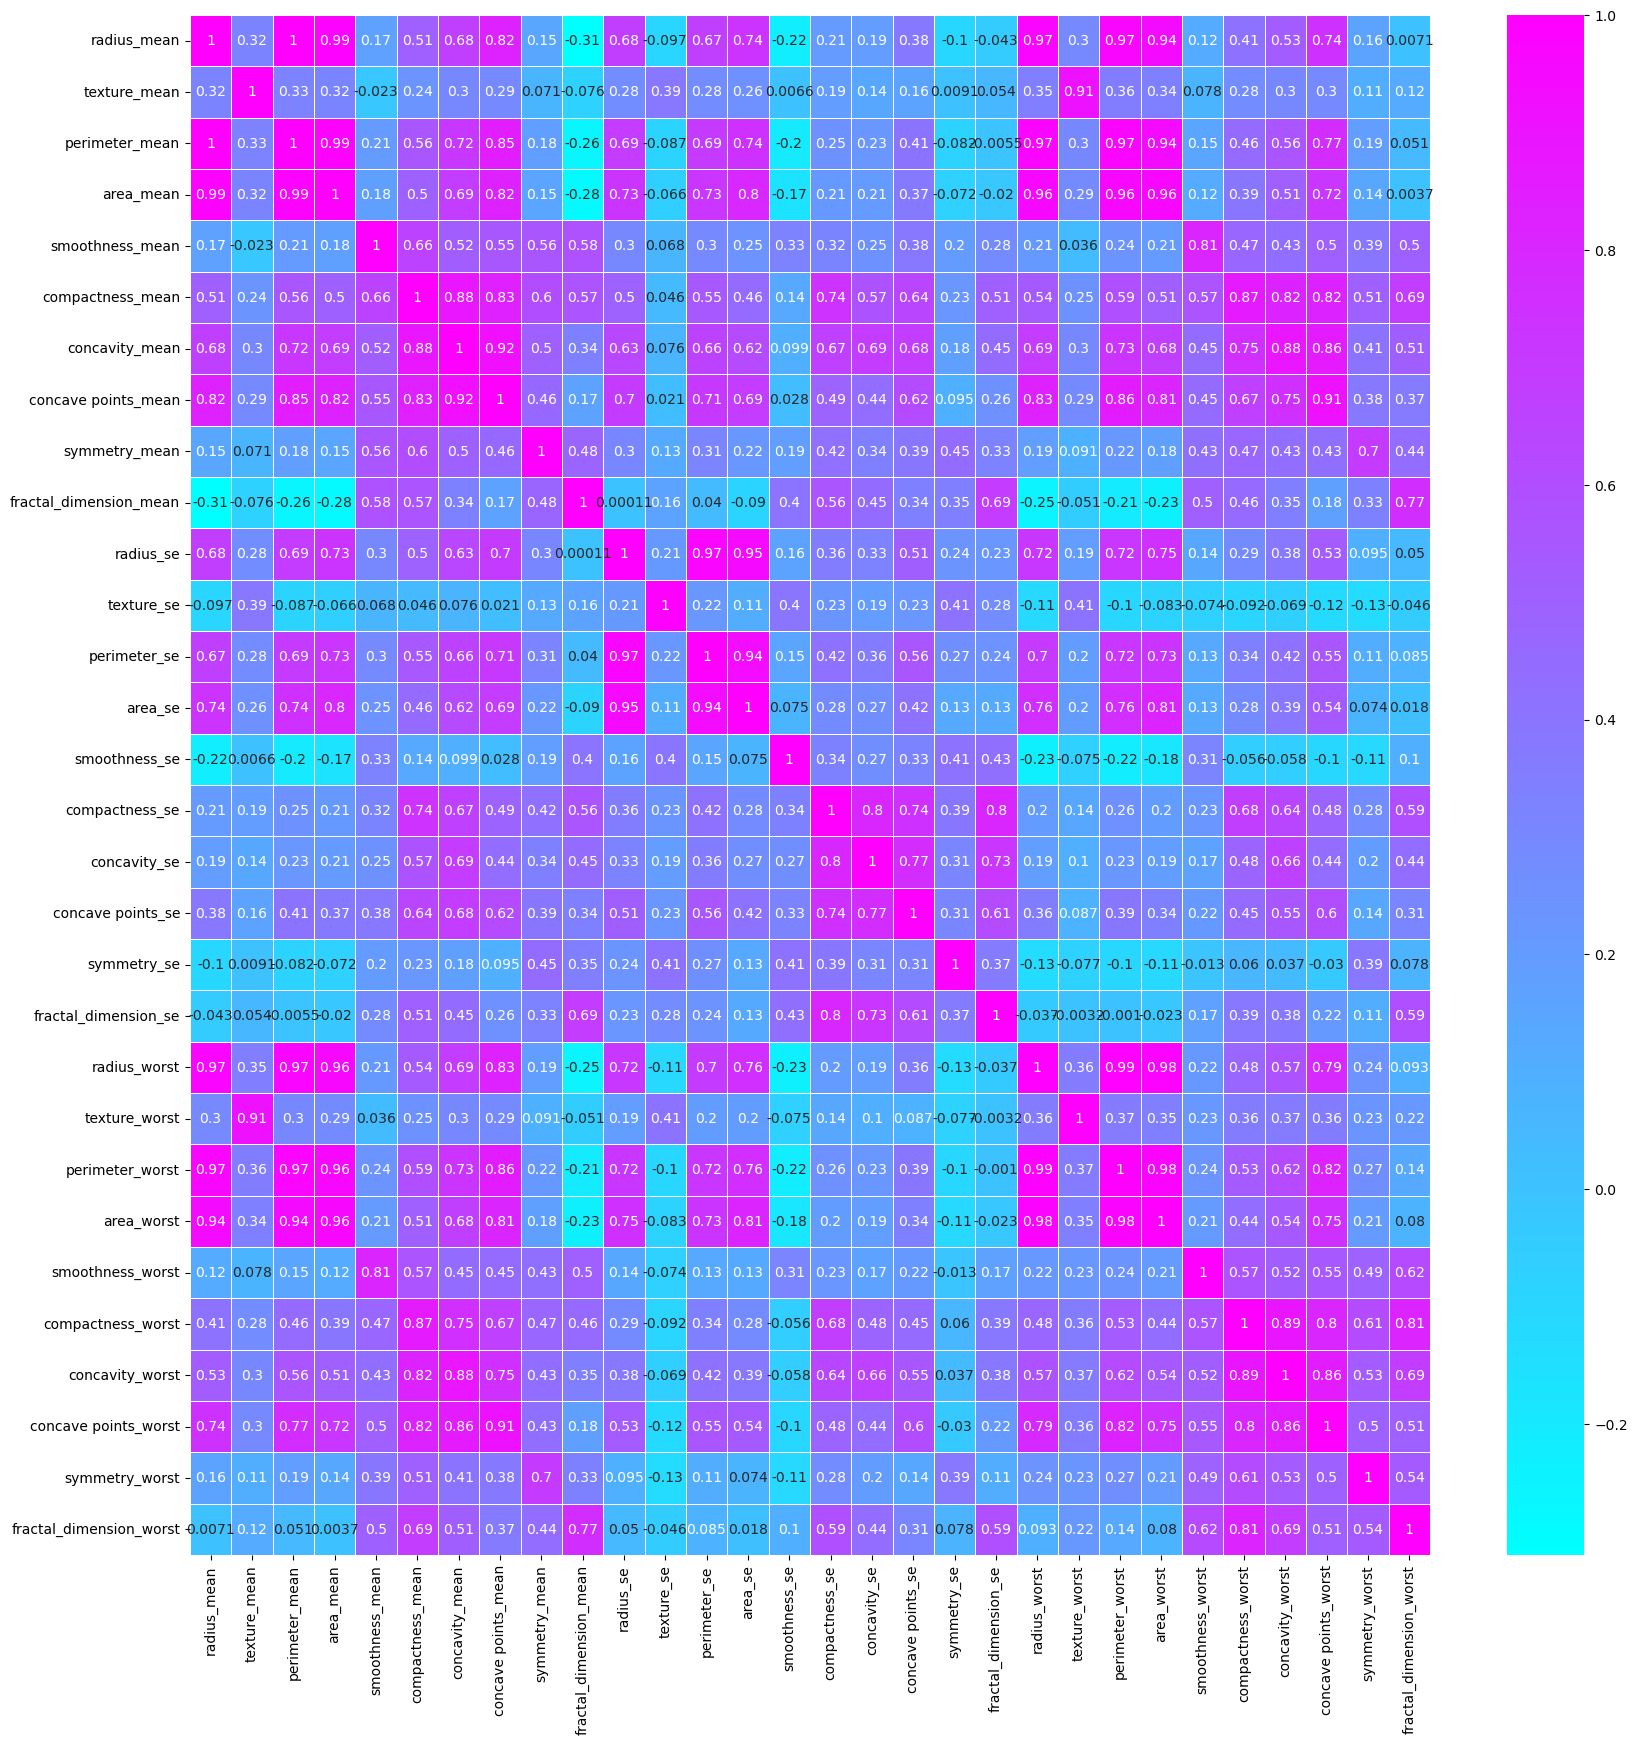

In [872]:
plt.figure(figsize=(20,20))

sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='cool',#cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()

#### Wrapper

Wrapper methods evaluate multiple models using procedures that add and/or remove features to find the optimal combination that maximizes model performance.

Generally, three directions of procedures are possible:

- Forward selection — starts with one feature and adds more iteratively. At each subsequent iteration, the best of the remaining original features are added based on performance criteria.

- Backward elimination — starts with all features and eliminates one-by-one iteratively.

- Step-wise selection — bi-directional, based on a combination of forward selection and backward elimination. It is considered less greedy than the previous two procedures since it does reconsider adding predictors back into the model that has been removed (and vice versa). Nonetheless, the considerations are still made based on local optimization at any given iteration.

##### Forward selection

In [881]:
# Define Sequential Forward Selection (sfs)
sfs = SFS(LogisticRegression(solver='lbfgs', max_iter=1000), 
           n_features_to_select= 20,
           tol=None,
           direction="forward", 
           scoring = None,
           cv=5,
           n_jobs=None)
sfs.fit(X_train, y_train)
sfs_features = sfs.get_feature_names_out()
# creating the dataframe
sfs_df = pd.DataFrame(data = sfs_features, columns = ['Accepted Feature'])

Features Selected by Sequential Forward Selection: 
['smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'smoothness_se' 'compactness_se' 'concavity_se'
 'concave points_se' 'symmetry_se' 'fractal_dimension_se' 'radius_worst'
 'texture_worst' 'area_worst' 'smoothness_worst' 'concave points_worst'
 'symmetry_worst' 'fractal_dimension_worst']


In [880]:
sfs_df

,feature
0,smoothness_mean
1,compactness_mean
2,concavity_mean
3,concave points_mean
4,symmetry_mean
5,fractal_dimension_mean
6,radius_se
7,perimeter_se
8,smoothness_se
9,compactness_se


##### Backward elimination

In [883]:
# Define Sequential Forward Selection (sfs)
sfs = SFS(LogisticRegression(solver='lbfgs', max_iter=2000),
           n_features_to_select= 20,
           tol=None,
           direction="backward", 
           scoring = None,
           cv=5,
           n_jobs=None)
sfs.fit(X_train, y_train)
sfs_features = sfs.get_feature_names_out()
# creating the dataframe
sfs_df = pd.DataFrame(data = sfs_features, columns = ['Accepted Feature'])

/Users/alexandrosfilios/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/alexandrosfilios/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/alexandrosfilios/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/alexandrosfilios/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/alexandrosfilios/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/alexandrosfilios/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/alexandrosfilios/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/alexandrosfilios/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/alexandrosfilios/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



KeyboardInterrupt: 

##### Step-wise selection

#### Lasso

It is a linear model that uses this cost function:
$$ \frac{1}{2N_{training}} \sum_{i=1}^{N_{training}}(y^{(i)}_{real} - y^{(i)}_{pred} )^2 + α \sum_{j=1}^n|α_j|$$

In the above cost function, $ a_j $ is the coefficient of the *j*-th feature. The final term is called $l_1$ penalty and *α* is a hyperparameter that tunes the intensity of this penalty term. The higher the coefficient of a feature, the higher the value of the cost function. So, the idea of Lasso regression is to optimize the cost function reducing the absolute values of the coefficients. Obviously, this works if the features have been previously scaled, for example using standardization or other scaling techniques. The *α* hyperparameter value must be found using a cross-validation approach.

Trying to minimize the cost function, Lasso regression will automatically select those features that are useful, discarding the useless or redundant features. In Lasso regression, discarding a feature will make its coefficient equal to 0.

So, the idea of using Lasso regression for feature selection purposes is very simple: we fit a Lasso regression on a scaled version of our dataset and we consider only those features that have a coefficient different from 0. Obviously, we first need to tune α hyperparameter in order to have the right kind of Lasso regression.

https://vitalflux.com/lasso-ridge-regression-explained-with-python-example/


In [ ]:
# Lasso Regression Cross-validation
# Create an instance of Lasso Regression implementation
lasso_cv = LassoCV(cv=5, tol=1e-2)
# Fit the Lasso model
lasso_cv.fit(X_train_scaled, y_train)
# Create the model score
print("Lasso accuracy scores: ")
print("Train: " + str(lasso_cv.score(X_train_scaled, y_train)))
print("Test: " + str(lasso_cv.score(X_test_scaled, y_test)))
# Create the coefficients
coefficients_lasso = lasso_cv.coef_
features_lasso = df.columns[1:].to_numpy()

In [ ]:
df_lasso = pd.DataFrame({'feature': features_lasso, 'coefficient': list(coefficients_lasso)}, columns=['feature', 'coefficient'])

In [ ]:
df_lasso_accepted = df_lasso[df_lasso["coefficient"] != 0].reset_index(drop=True)
df_lasso_denied = df_lasso[df_lasso["coefficient"] == 0].reset_index(drop=True)

In [ ]:
lasso_selection =  list(df_lasso_accepted['feature'])

## Train & Model Evaluation

In [ ]:
results.drop(results.index,inplace=True) 

In [ ]:
def train_evaluate_model(model,X_train,y_train,X_test,y_test):
    
    # Fit the model
    model.fit(X_train, y_train)  #fit the model instance 
    
    # Make the predictions
    predictions = model.predict(X_test) # calculate predictions
    
    # Compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions) # Accuracy
    f1 = f1_score(y_test, predictions) # F1
    precision = precision_score(y_test, predictions) # Precision Score
    recall = recall_score(y_test, predictions) # Recall
    balanced_accuracy = balanced_accuracy_score(y_test, predictions) # Balanced Accuracy

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df

### Linear Regression

In [ ]:
lg = LogisticRegression(solver='lbfgs', max_iter=3000)
lg_results = train_evaluate_model(lg, X_train, y_train, X_test, y_test)

lg_results.index = ['LogisticRegression']
results = pd.concat([results,lg_results])

### KNN (K-Nearest Neighbors Algorithm)

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=12)
knn_result = train_evaluate_model(KNN, X_train, y_train, X_test, y_test)

knn_result.index =['KNearsNeighbors']
results = pd.concat([results,knn_result])

### Naive Bayes Classifier

In [ ]:
Naive_Bayes = GaussianNB()
Naive_Bayes_result = train_evaluate_model(Naive_Bayes, X_train, y_train, X_test, y_test)

Naive_Bayes_result.index = ['NaiveBayes']
results = pd.concat([results,Naive_Bayes_result])

### GDA (Gaussian Discriminant Analysis)

### SVM (Support Vector Machines)

In [ ]:
svm_clf = SVC()
svm_result = train_evaluate_model(svm_clf,X_train, y_train, X_test, y_test)

svm_result.index = ['SVM']
results = pd.concat([results,svm_result])

### Decision tree

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree_result = train_evaluate_model(decision_tree,X_train, y_train, X_test, y_test)

decision_tree_result.index = ['DecisionTree']
results = pd.concat([results,decision_tree_result])

### RF (Random Forest Classifier)

In [ ]:
rfc = RandomForestClassifier()
rfc_result = train_evaluate_model(rfc, X_train, y_train, X_test, y_test)

rfc_result.index = ['RandomForest']
results = pd.concat([results,rfc_result])

### Gradient Boosting Classifier

In [ ]:
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
GBC_result = train_evaluate_model(GBC, X_train, y_train, X_test, y_test)

GBC_result.index = ['Gradient Boosting']
results = pd.concat([results,GBC_result])

### AdaBoost Classifier

In [ ]:
ABC = AdaBoostClassifier(n_estimators=100, random_state=0)
AdaBoost_result = train_evaluate_model(ABC, X_train, y_train, X_test, y_test)

AdaBoost_result.index = ['AdaBoost']
results = pd.concat([results,AdaBoost_result])

### Final Evaluation

In [ ]:
results.style.background_gradient(cmap = sb.color_palette("cool", as_cmap=True))